In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
data_dir = '/content/drive/MyDrive/Data'

In [ ]:
for img_class in os.listdir(data_dir):
  print(img_class)

No Drone
Drone


In [ ]:
img = cv2.imread(os.path.join(data_dir, 'No Drone', '00000H_00.jpg'))

In [ ]:
img.shape

(389, 515, 3)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
dir = '/content/drive/MyDrive/Data/Drone'


33


In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 2012 files belonging to 2 classes.


In [ ]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

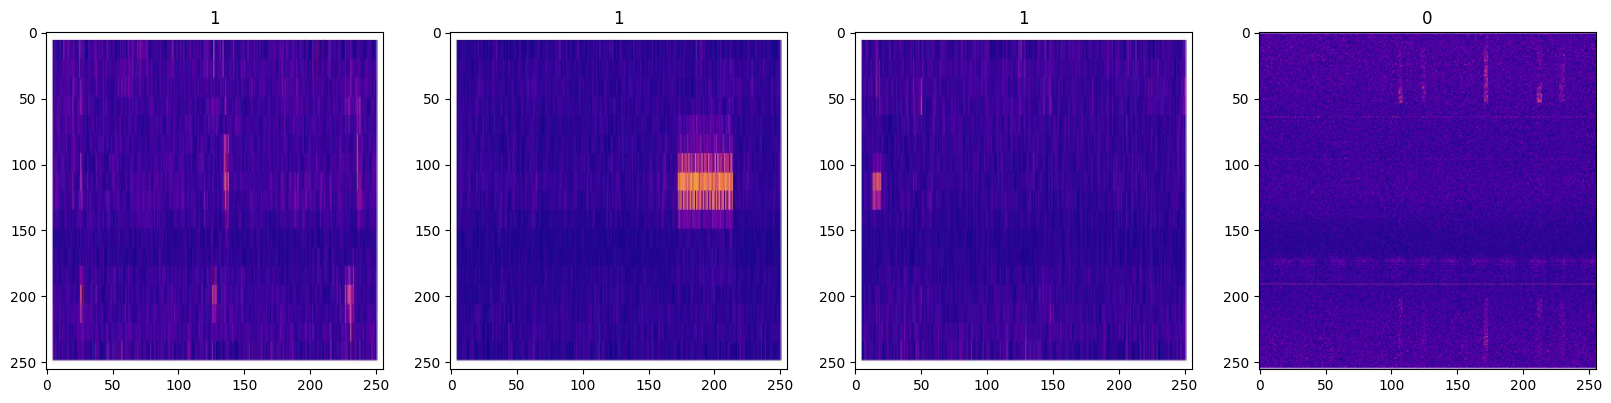

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(batch)

2

In [ ]:
batch[0].min()

0.0

In [ ]:
data.as_numpy_iterator().next()

In [ ]:
x = len(data)
print(x)

63


In [ ]:
train_size = int(x*.7)
val_size = int(x*.2)+1
test_size = int(x*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
img_rows = 256
img_cols = 256
channels = 3
# Create the CNN model with Batch Normalization
model = Sequential()
model.add(Conv2D(16, (3, 3), 4, activation='relu', input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(BatchNormalization())

# Add more convolutional layers with Batch Normalization
model.add(Conv2D(32, (3, 3), 4, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), 4, activation='relu'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(BatchNormalization())

# Flatten the output
model.add(Flatten())

# Dense layers for classification (number of units depends on your problem)
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model for multi-class classification
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                      

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 7s 113ms/step - loss: 0.5305 - accuracy: 0.7209 - val_loss: 0.6616 - val_accuracy: 0.6202
Epoch 2/20
44/44 [==============================] - 5s 105ms/step - loss: 0.4107 - accuracy: 0.7848 - val_loss: 0.8487 - val_accuracy: 0.5841
Epoch 3/20
44/44 [==============================] - 5s 113ms/step - loss: 0.3316 - accuracy: 0.8324 - val_loss: 1.0134 - val_accuracy: 0.6034
Epoch 4/20
44/44 [==============================] - 5s 108ms/step - loss: 0.2919 - accuracy: 0.8544 - val_loss: 1.1167 - val_accuracy: 0.6130
Epoch 5/20
44/44 [==============================] - 6s 116ms/step - loss: 0.2412 - accuracy: 0.8857 - val_loss: 1.3437 - val_accuracy: 0.6154
Epoch 6/20
44/44 [==============================] - 5s 113ms/step - loss: 0.2162 - accuracy: 0.9055 - val_loss: 1.6485 - val_accuracy: 0.5938
Epoch 7/20
44/44 [==============================] - 5s 108ms/step - loss: 0.2049 - accuracy: 0.9091 - val_loss: 1.6664 - val_accuracy: 0.5769
Epoch 

In [ ]:
2012/32*0.7

44.012499999999996

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9444444, shape=(), dtype=float32) tf.Tensor(0.65384614, shape=(), dtype=float32) tf.Tensor(0.84042555, shape=(), dtype=float32)


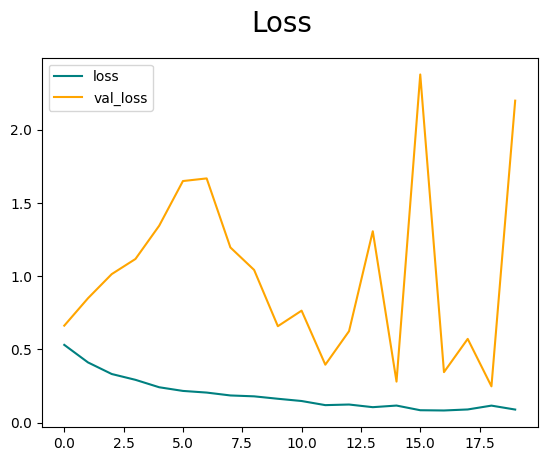

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

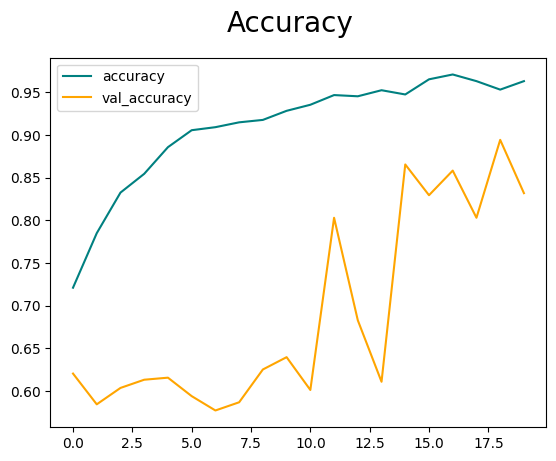

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

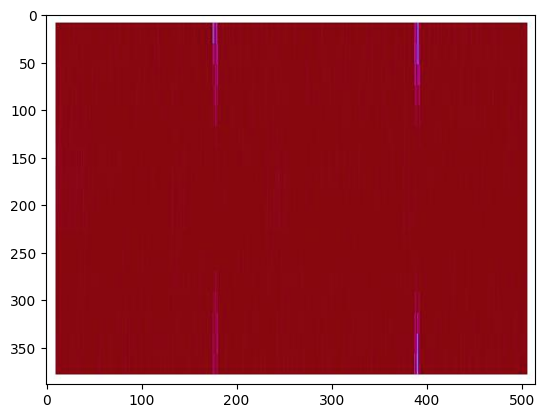

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Data/Drone/10000H_17.jpg')
plt.imshow(img)
plt.show()

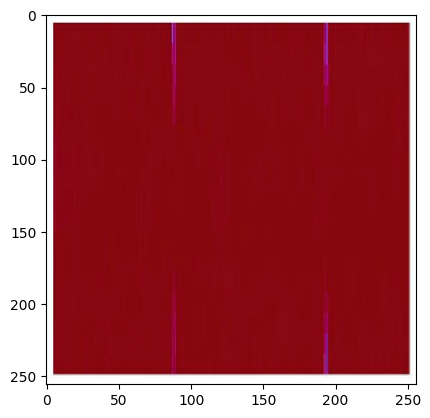

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [ ]:
yhat

array([[0.9933828]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is No Drone')
else:
    print(f'Predicted class is Drone')

Predicted class is No Drone


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))